<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/03_04_skylines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
rects = [(3, 13, 9), (1, 11, 5), (19, 18, 22), (3, 6, 7), (16, 3, 25), (12, 7, 16)]

In [2]:
def toRect(triple):
  g, h, d = triple
  return [(g, 0), (g, h), (d, h), (d, 0)]

In [3]:
import matplotlib.pyplot as plt

In [6]:
rect = toRect(rects[0])
print(rect)
x, y = zip(*rect)
print(x)
print(y)

[(3, 0), (3, 13), (9, 13), (9, 0)]
(3, 3, 9, 9)
(0, 13, 13, 0)


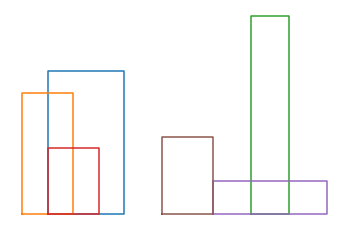

In [5]:
for rect in rects:
  r = toRect(rect)
  r.append(r[0])
  x, y = zip(*r)
  plt.plot(x, y)

plt.axis("off")
plt.show()

In [9]:
def drawContour(contour):
  points = [(0, 0)]
  for x, y in contour:
    points.append((x, points[-1][1]))
    points.append((x, y))
  x, y = zip(*points)
  plt.plot(x, y)

In [13]:
def toContour(triple):
  g, h, d = triple
  return [(g, h), (d, 0)]

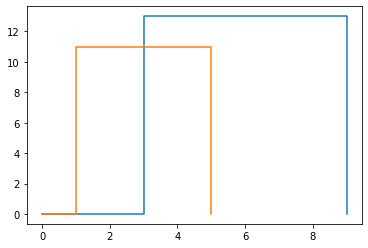

In [15]:
contour0 = toContour(rects[0])
contour1 = toContour(rects[1])
drawContour(contour0)
drawContour(contour1)
plt.show()

In [17]:
def addPoint(res, x, y):
  if len(res) > 0:
    if res[-1][1] == y:
      return
    elif res[-1][0] == x:
      x0, y0 = res[-1]
      res[-1] = (x, max(y, y0))
      return

  res.append((x, y))

In [18]:
def merge(c1, c2):
  res = []
  n1, n2 = len(c1), len(c2)
  i1, i2 = 0, 0
  y1, y2 = 0, 0
  while i1 < n1 or i2 < n2:
    if i2 >= n2 or i1 < n1 and c1[i1][0] < c2[i2][0]:
      x, y1 = c1[i1]
      i1 += 1
    else:
      x, y2 = c2[i2]
      i2 += 1
    y = max(y1, y2)
    addPoint(res, x, y)

  return res

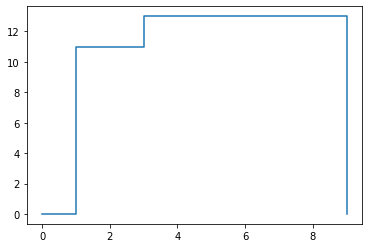

In [19]:
contour2 = merge(contour0, contour1)
drawContour(contour2)
plt.show()

In [20]:
contour = toContour(rects[0])
for i in range(1, len(rects)):
  contour0 = toContour(rects[i])
  contour = merge(contour, contour0)
print(contour)

[(1, 11), (3, 13), (9, 0), (12, 7), (16, 3), (19, 18), (22, 3), (25, 0)]


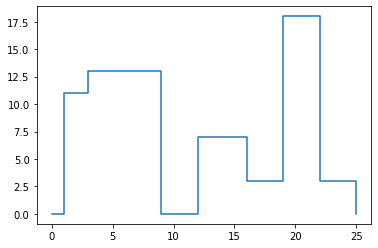

In [21]:
drawContour(contour)

In [22]:
def skylines(rects, i, f):
  if i == f:
    return toContour(rects[i])
  else:
    mid = (i + f) // 2
    c1 = skylines(rects, i, mid)
    c2 = skylines(rects, mid+1, f)
    return merge(c1, c2)

In [23]:
contour = skylines(rects, 0, len(rects) - 1)
print(contour)

[(1, 11), (3, 13), (9, 0), (12, 7), (16, 3), (19, 18), (22, 3), (25, 0)]


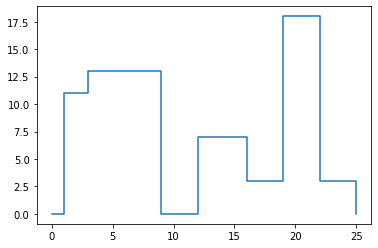

In [24]:
drawContour(contour)